<a href="https://colab.research.google.com/github/devu-13here/ML_assignmentt/blob/main/lab_assignment_5)que1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier



In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Step 1: Create a DataFrame from the dataset for better readability
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [3]:

# Print the head of the dataset
print("Head of the Iris Dataset:")
print(df.head())



Head of the Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


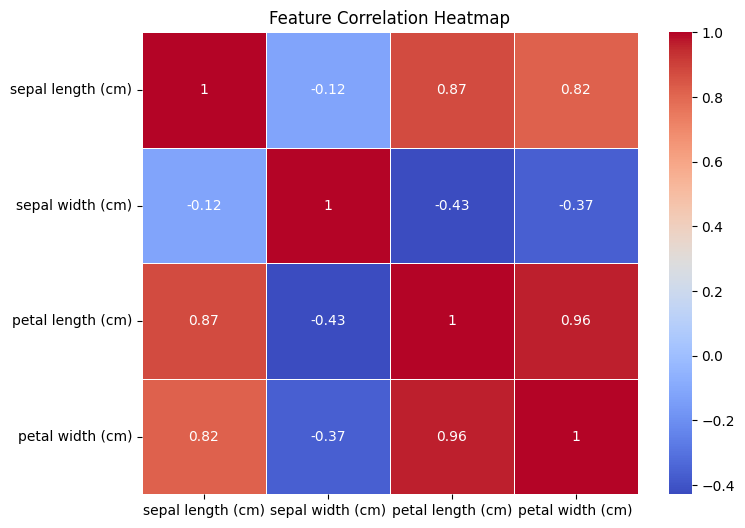

In [4]:
# Plotting the heatmap of feature correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop(columns='target').corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [5]:
# Step 2: Split the dataset into features (X) and labels (y)
X = df.drop(columns='target')  # Features
y = df['target']  # Labels (target classes)

# Step 3: Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 4: Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [7]:

# Step 5: Train Multiclass Logistic Regression using One-vs-Rest strategy
ovr_classifier = OneVsRestClassifier(LogisticRegression(random_state=42))
ovr_classifier.fit(X_train_scaled, y_train)



OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

In [8]:

# Step 6: Make predictions
y_train_pred = ovr_classifier.predict(X_train_scaled)
y_test_pred = ovr_classifier.predict(X_test_scaled)

# Step 7: Evaluate the model (on training and test sets)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)



In [11]:
# Print training and testing accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_test_pred))

Training Accuracy: 0.9333
Testing Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
